In [ ]:
#Text Classifier
#Import Libraries
import numpy as np
import re
import pickle
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files #using the load file function, we import dataset
nltk.download('stopwords')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
#Read dataset file
#encoding='mac_roman' if issue persists
nftlist = pd.read_csv('nftlist.csv', encoding_errors='ignore')

In [ ]:
nftlist

,ProjectName,Items,Owners,FloorPrice,Volume,Whitepaper
0,Rebel Bots,10000,3400,0.290,2400,table of contents Executive Summary Game Desig...
1,WE ARE THE OUTKAST,10000,3100,0.020,801,REDEFINE REALITY The Official White Paper of M...
2,Gray Boys,10000,3300,0.900,4900,Preface We expect the volume of people partici...
3,Ninja Squad Official,8900,3200,0.325,1400,WHITEPAPER *****2021 ENG WHITEPAPER 2021 Hey t...
4,STARL,10000,1700,0.073,321,STARL Project Whitepaper 2.0 Explore the STARL...
5,Cool Monkes Genesis,10000,828,0.200,9200,Cool Monkes WP 2.0 Cool Monkes is a uniquely f...
6,Galaxy Fight Club,10100,2600,0.450,7200,Galaxy Fight Club Official Galaxy Fight Club W...
7,INCOGNITO,10000,3200,0.049,5400,"INCOGNITO Incognito Whitepaper, last updated J..."
8,Goons of Balatroon,9700,3200,0.170,3100,Whitepaper November 2021 Edition TABLE OF CONT...
9,PXQuest,5000,3100,0.278,2800,SUSPICIOUS MONKEY STUDIOS PXQUEST WHITEPAPER V...


In [ ]:
# Assign text data to variable
X = nftlist['Whitepaper']
X.head()

0    table of contents Executive Summary Game Desig...
1    REDEFINE REALITY The Official White Paper of M...
2    Preface We expect the volume of people partici...
3    WHITEPAPER *****2021 ENG WHITEPAPER 2021 Hey t...
4    STARL Project Whitepaper 2.0 Explore the STARL...
Name: Whitepaper, dtype: object

In [ ]:
#Load_file function for large datasets is time consuming
#To get away, we store X,Y as a pickle file - Save file on disk
#Store pickle file
with open ('X.pickle','wb') as f:#wb, write-byte
    pickle.dump (X,f)

In [ ]:
#Unpickling the dataset
with open ('X.pickle','rb') as f:#rb, read-byte
    X=pickle.load(f)

In [ ]:
#New Preprocessing X
#Creating a Corpus - A list Corpus will contain all pre-processed documents
corpus=[]
for i in range (0,len(X)):
    review = re.sub(r'[^a-zA-Z]', ' ',str(X[i])) #remove all non-word characters, punctuations, ASCII signs, and numbers
    review=review.lower() #convert to lower case
    #review=review.strip()
    review=re.sub(r'\b[a-zA-Z]\b',' ', review) #remove single chracaters
    review=re.sub(r'^[a-z]\s+',' ', review) #remove single chracaters at the start of sentences
    review=re.sub(r'\s+',' ', review) #remove extra spaces
    corpus.append(review) #Append each
norm_corpus=corpus

In [ ]:
norm_corpus

['table of contents executive summary game design goals backstory and lore kingdoms kingdom lords kingdom lands kingdom players fighting bots classes and stats cards and rarity building fighting robots gameplay adventure mode pve multiplayer mode pvp gameplay mechanics curencies and resources leaderboards and season prizes team investors team investors partners key investors partners trademark tokenomics decentralized autonomous organization dao technology roadmap rebel bots collection disclaimer executive summary welcome to the rebel bots universe rebel bots xoil wars is cross platform card battle game players will be able to play progress and earn in single player or multiplayer sci fi themed game taking place in outer space the game will require players to unite around extra terrestrial kingdoms build their army of fighting robots and compete with other players for the valuable xoil resource introduction our vision is to create leading game franchise within the blockchain games spac

In [ ]:
#Create Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
#Create an object of count vectorizer, max_features is top n most frequent words as features
#min_df if a word appear in less than 3, it would be removed
#max_df exlucde all words that appear in 60% of documents or more than than (e.g. the) - focus only on important words
#finally exclude all stop words that are in the list specified
cv = CountVectorizer(max_features=2000,min_df=3, max_df=0.6, stop_words=stopwords.words('english'))
#now create BOW model
X = cv.fit_transform(norm_corpus).toarray()

In [ ]:
cv_matrix=cv.fit_transform(norm_corpus)

In [ ]:
cv_matrix=cv_matrix.toarray()

In [ ]:
vocab=cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Topic Model - LDA model
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation (n_components=3, max_iter=10000, random_state=0)
dt_matrix=lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix,columns=['T1','T2','T3'])
features

,T1,T2,T3
0,0.000219,0.000221,0.999560
1,0.961797,0.000266,0.037937
2,0.001054,0.997953,0.000993
3,0.003011,0.994009,0.002980
4,0.999317,0.000340,0.000343
5,0.001507,0.001429,0.997064
6,0.000236,0.000226,0.999538
7,0.000256,0.999495,0.000249
8,0.999482,0.000259,0.000259
9,0.496893,0.001010,0.502097


In [14]:
#Review Topic Constituents
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic=[(token,weight) for token, weight in zip(vocab, topic_weights)]
    topic=sorted(topic,key=lambda x: -x[1])
    topic=[item for item in topic if item[1]>0.60]
    print(topic)
    print()

[('assets', 91.00036575108712), ('users', 70.50638142010878), ('rock', 66.23856837715697), ('digital', 54.03523515299315), ('card', 49.075270447673944), ('tools', 48.307789059128204), ('wolf', 47.333322876655856), ('gaming', 44.43249039122532), ('company', 36.33259103754652), ('owners', 35.90993083366376), ('staking', 34.9901232351213), ('items', 34.853860754841854), ('games', 34.28609323281135), ('collections', 33.49195913762189), ('economy', 33.20798885393954), ('power', 33.17548688733497), ('traits', 32.679481286045686), ('mission', 31.837516674852186), ('cards', 31.331567327715053), ('pool', 31.281429242341837), ('supply', 31.170604132228075), ('battle', 30.885561180657795), ('whitepaper', 30.811152985994482), ('virtual', 29.72997368986596), ('distribution', 29.33683674120556), ('document', 29.335120724747892), ('real', 28.5494439189245), ('beta', 28.204372860285734), ('month', 27.582241653255178), ('experience', 26.78226179479148), ('yield', 25.322281262282658), ('trait', 25.26305

In [15]:
# Use NFT price values to find weighted average
nft_avg = nftlist.drop(labels= ['Whitepaper'], axis= 1)
nft_avg

,ProjectName,Items,Owners,FloorPrice,Volume
0,Rebel Bots,10000,3400,0.290,2400
1,WE ARE THE OUTKAST,10000,3100,0.020,801
2,Gray Boys,10000,3300,0.900,4900
3,Ninja Squad Official,8900,3200,0.325,1400
4,STARL,10000,1700,0.073,321
5,Cool Monkes Genesis,10000,828,0.200,9200
6,Galaxy Fight Club,10100,2600,0.450,7200
7,INCOGNITO,10000,3200,0.049,5400
8,Goons of Balatroon,9700,3200,0.170,3100
9,PXQuest,5000,3100,0.278,2800


In [16]:
# Weighted average of First Topic
cluster1 = nft_avg.iloc[[1, 4, 8, 13, 14, 15, 16]]

weighted_avg_c1 = round(np.average(cluster1['FloorPrice'], weights = cluster1['Volume']),2)


cluster1, weighted_avg_c1

(                        ProjectName  Items  Owners  FloorPrice  Volume
 1               WE  ARE THE OUTKAST  10000    3100       0.020     801
 4                             STARL  10000    1700       0.073     321
 8                Goons of Balatroon   9700    3200       0.170    3100
 13                    Hungry Wolves   6000    1400       0.090     365
 14                      PixaWizards   1000     478       0.090     286
 15                     Gods of Rock   6900    2300       0.027     195
 16  vEmpire - The Founding Soldiers    582     135       0.169     181, 0.13)

In [17]:
# Weighted average of Second Topic
cluster2 = nft_avg.iloc[[2, 3, 7, 11, 12, 18, 19]]

weighted_avg_c2 = round(np.average(cluster2['FloorPrice'], weights = cluster2['Volume']),2)


cluster2, weighted_avg_c2

(               ProjectName  Items  Owners  FloorPrice  Volume
 2                Gray Boys  10000    3300       0.900    4900
 3     Ninja Squad Official   8900    3200       0.325    1400
 7                INCOGNITO  10000    3200       0.049    5400
 11    Voxel Ville Official   4300    1700       0.370    1900
 12           Purojekto3333   2200     569       0.095     360
 18  The Nemesis Companions   5600    1400       0.035      29
 19            The Cult DAO   1000     556       0.027      23, 0.42)

In [18]:
# Weighted average of Third Topic
cluster3 = nft_avg.iloc[[0, 5, 6, 9, 10, 17]]
weighted_avg_c3 = round(np.average(cluster3['FloorPrice'], weights = cluster3['Volume']),2)


cluster3, weighted_avg_c3

(                ProjectName  Items  Owners  FloorPrice  Volume
 0                Rebel Bots  10000    3400       0.290    2400
 5       Cool Monkes Genesis  10000     828       0.200    9200
 6         Galaxy Fight Club  10100    2600       0.450    7200
 9                   PXQuest   5000    3100       0.278    2800
 10    Uninterested Unicorns   6900    1300       0.120    2100
 17  Bulldroids NFT Official   6000    2600       0.031     118, 0.29)

#Clustering

In [ ]:
#Calculate TF-IDF for raw data, using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer (min_df=0.2, max_df=0.8, norm='l2', 
                    #max_df ignore terms that appear in more than x% of the documents, 1 means ignore nothing!
                    #min_df ignore terms that appear in less than x% of the documents 
                  use_idf=True, smooth_idf=True)
tv_matrix=tv.fit_transform(norm_corpus)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names()
pd.DataFrame (np.round(tv_matrix,2), columns=vocab)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abilities,ability,able,about,above,accepted,access,accessible,accessories,according,...,worlds,worth,would,www,year,years,yet,yield,yourself,zero
0,0.03,0.04,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.02,...,0.01,0.00,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.01
1,0.01,0.09,0.01,0.03,0.01,0.00,0.03,0.00,0.01,0.03,...,0.02,0.01,0.01,0.00,0.02,0.06,0.01,0.08,0.00,0.00
2,0.00,0.04,0.01,0.00,0.00,0.00,0.12,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.04,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.06,0.14,0.13,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.03,0.04,0.01,0.01,0.02,0.01,0.04,0.01,0.00,0.01,...,0.02,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.01,0.01
5,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.04,0.00,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.03,0.03,0.01,0.01,0.00,0.03,0.00,0.00,0.01,...,0.00,0.01,0.02,0.00,0.01,0.04,0.01,0.04,0.00,0.00
7,0.00,0.01,0.02,0.02,0.00,0.00,0.07,0.00,0.00,0.00,...,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.02,0.00,0.01,...,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.02
9,0.03,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.08,0.00,0.00


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity 
#Cosine of angle between feature vector representations of two text documents
#the smaller the angle between documents, the more similar they are

In [ ]:
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
#similarity_df

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage (similarity_df, 'ward')
#Z

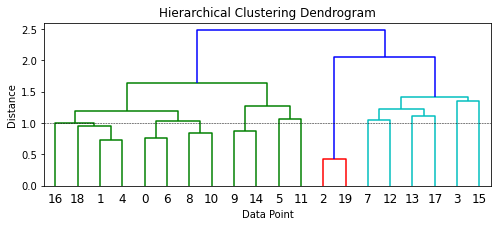

In [ ]:
#Let's visualize the dendeogram

plt.figure (figsize = (8,3))
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
dend=plt.axhline(y=1.0,c='k',ls='--',lw=0.5);
plt.show(dend)